In [ ]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 35.6 MB/s 
     |████████████████████████████████| 944 kB 37.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
#from dython import nominal

In [2]:
data = pd.read_csv('/content/DF_all_materials.csv')

In [ ]:
material = "ROOFTILE"

#ziegel density = 1.7 t/m3

data["vol_m"] = data[material] / 1.7
data["percentage"] = (data["vol_m"] / data["VOL"])*100

Drop columns not relevant for the current model

In [3]:
data = data.drop(columns=['EGID', 'VAR_NAME', 'WOOD', 'METAL', 'MINERAL', 'GLASS'])
print(data)
print(data.shape)

       EGID   VOL  AREA_F  APT_NUM  ST_NUM  KREIS  ZIPCODE ROOF   YOC  \
0    165370  1328     119        5       5     10     8049    P  1933   
1    165460  1016     109        5       4     10     8049    P  1938   
2    169578   915      95        1       4     11     8050    P  1933   
3    169461   422      72        1       4     11     8050    P  1891   
4    161142  5010     215        3       5      9     8047    P  1952   
..      ...   ...     ...      ...     ...    ...      ...  ...   ...   
402  162478  1172     176        5       3      9     8048    P  1949   
403  162476  1168     175        4       3      9     8048    P  1949   
404  162474  1202     173        5       3      9     8048    P  1949   
405  162486  1801     179        6       4      9     8048    P  1950   
406  162487  1953     183        6       4      9     8048    P  1950   

             POC  ROOFTILE  
0    1919 - 1945     11.90  
1    1919 - 1945     51.00  
2    1919 - 1945      9.00  
3      

Statistical description of the data

In [ ]:
data.describe()


,VOL,AREA_F,APT_NUM,ST_NUM,KREIS,ZIPCODE,YOC,ROOFTILE,material_n_m3,material_n_m2
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,245.000000,245.000000,245.000000
mean,1804.142506,172.208845,6.051597,4.665848,7.663391,8041.960688,1938.503686,19.279020,0.015730,0.135285
std,2600.570467,208.078881,11.296488,1.175023,3.108420,16.632315,19.557150,21.660365,0.023151,0.182320
min,74.000000,30.000000,1.000000,1.000000,2.000000,8002.000000,1850.000000,0.000000,0.000000,0.000000
25%,880.000000,109.500000,1.000000,4.000000,6.000000,8038.000000,1931.000000,7.990000,0.004963,0.051154
50%,1572.000000,165.000000,5.000000,5.000000,9.000000,8048.000000,1946.000000,13.010000,0.007212,0.074829
75%,2043.500000,184.000000,6.000000,5.000000,11.000000,8052.000000,1950.000000,18.860000,0.014514,0.150442
max,45753.000000,3865.000000,138.000000,11.000000,12.000000,8057.000000,1987.000000,144.500000,0.216642,1.806250


Eliminate NaN values

In [4]:
print(data.shape)
data = data.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
print(data.shape)

(407, 11)
(245, 11)


In [ ]:
data.isnull().sum()


VOL              0
AREA_F           0
APT_NUM          0
ST_NUM           0
KREIS            0
ZIPCODE          0
ROOF             0
YOC              0
POC              0
ROOFTILE         0
material_n_m3    0
material_n_m2    0
dtype: int64

In [ ]:
#SIZE AND STYLE

fontname = 'Liberation Sans'
horizontal = 20
title_size = 14
title_alg = 'center'
color = 'maroon'
spacing = 0.5
tpad = 15

#DATA
material = "ROOFTILE"

Treat outliers with IQR


In [5]:
# FUNCTION

def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

#ROOFTILE

old = data.shape[0]
l_wood,u_wood = outlier_treatment(data.ROOFTILE)
print('Lower-upper range for ROOFTILE: ', l_wood,u_wood)

data.drop(data[(data.ROOFTILE < l_wood) | (data.ROOFTILE > u_wood)].index , inplace=True)
wood_data = data
new = data.shape[0]

print(wood_data.describe(), '\n')
print('Removed: ', old - new, '\n')

# VOLUME
old = new
l_vol,u_vol = outlier_treatment(wood_data.VOL)
print('Lower-upper range for VOL: ', l_vol, u_vol)

wood_data.drop(wood_data[(wood_data.VOL < l_vol) | (wood_data.VOL > u_vol)].index , inplace=True)
vol_data = wood_data
new = vol_data.shape[0]

print(vol_data.describe(), '\n')
print('Removed: ', old - new, '\n')

#FOOTPRINT
old = new
l_area,u_area = outlier_treatment(vol_data. APT_NUM)
print('Lower-upper range for APT_NUM: ', l_area, u_area,'\n')

vol_data.drop(vol_data[(vol_data.APT_NUM < l_area) | (vol_data.APT_NUM > u_area)].index , inplace=True)
yoc_data = vol_data
new = yoc_data.shape[0]

print(yoc_data.describe(),'\n')
print('Removed: ', old - new, '\n')
"""
# YOC
old = new
l_YOC,u_YOC = outlier_treatment(vol_data.YOC)
print('Lower-upper range for YOC: ', l_YOC, u_YOC,'\n')

yoc_data.drop(yoc_data[(yoc_data.YOC < l_YOC) | (vol_data.YOC > u_YOC)].index , inplace=True)
new_data = yoc_data
new = new_data.shape[0]

print(new_data.describe(),'\n')
print('Removed: ', old - new, '\n')
"""
new_data = yoc_data

Lower-upper range for ROOFTILE:  -8.315 35.165
               EGID          VOL      AREA_F     APT_NUM      ST_NUM  \
count  2.180000e+02   218.000000  218.000000  218.000000  218.000000   
mean   9.926580e+06  1627.353211  160.077982    4.807339    4.577982   
std    5.332991e+07   834.760618   60.819733    3.740369    1.150384   
min    1.413330e+05    74.000000   30.000000    1.000000    1.000000   
25%    1.510555e+05   995.500000  117.000000    1.000000    4.000000   
50%    1.624750e+05  1598.000000  166.000000    5.000000    5.000000   
75%    1.678508e+05  2141.750000  185.000000    6.000000    5.000000   
max    3.020471e+08  5363.000000  406.000000   32.000000    7.000000   

            KREIS      ZIPCODE          YOC    ROOFTILE  
count  218.000000   218.000000   218.000000  218.000000  
mean     7.692661  8039.917431  1936.151376   12.866697  
std      3.067902    17.057846    19.283718    7.745049  
min      2.000000  8002.000000  1858.000000    0.000000  
25%      6.000

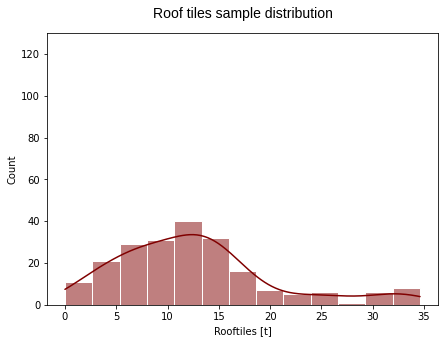

In [ ]:
#HISTOGRAM - LABEL
f = plt.figure(figsize=(7,5))
gs = f.add_gridspec(1, 1)

ax = f.add_subplot(gs[0, 0])
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    sns.histplot(data=new_data, x=material, kde=True, cbar = True, color = color).set_title(
  'Roof tiles sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Rooftiles [t]')
    plt.ylim(0, 130)
    
f.savefig("z_label_dist.png")

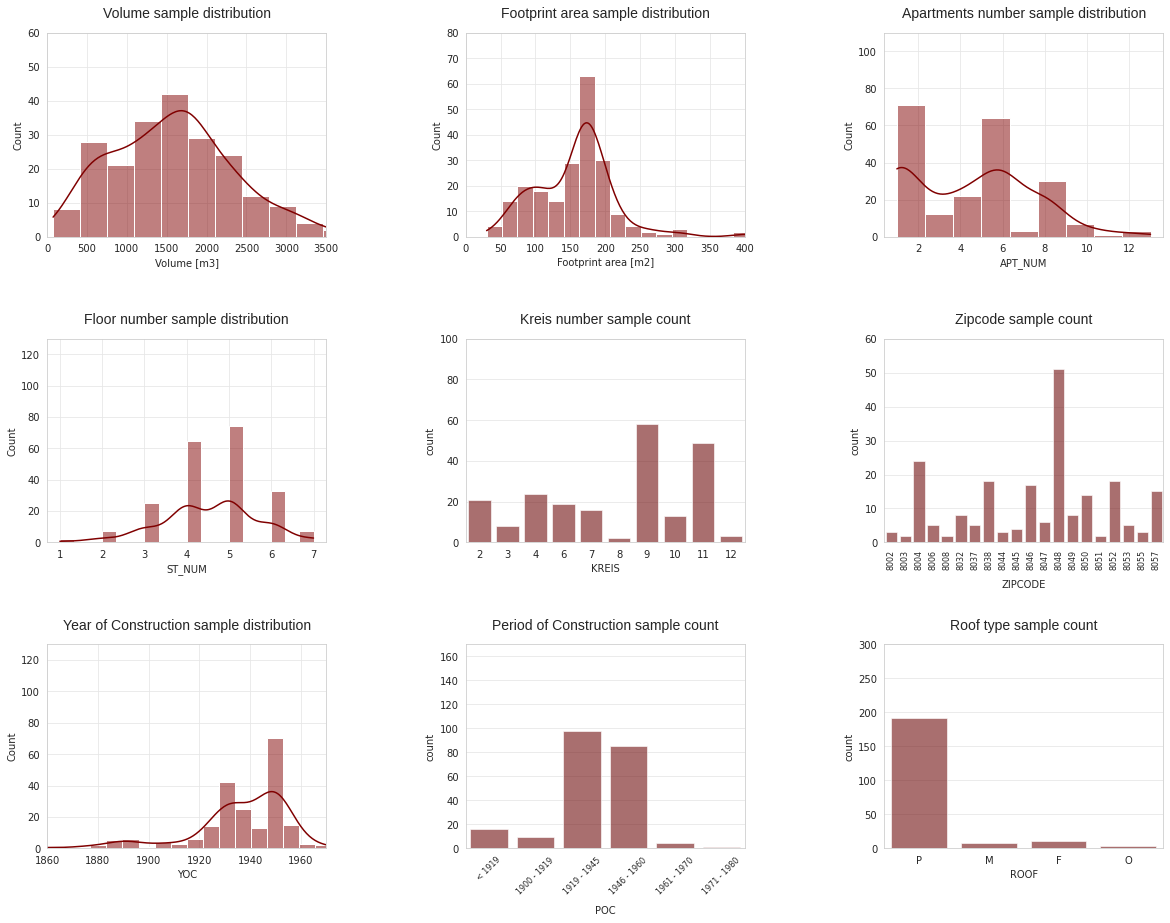

In [ ]:
#HISTOGRAMS - FEATURES

f = plt.figure(figsize=(20,15))
gs = f.add_gridspec(3, 3)
gs.update(wspace = spacing, hspace = spacing)

# FIRST ROW

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.histplot(data=data, x="VOL", kde=True, cbar = True, color = color).set_title(
  'Volume sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Volume [m3]')
    plt.ylim(0, 60)
    plt.xlim(0, 3500)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.histplot(data=data, x="AREA_F", kde=True, cbar = True, color = color).set_title(
  'Footprint area sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Footprint area [m2]')
    plt.ylim(0, 80)
    plt.xlim(0, 400)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.histplot(data=data, x="APT_NUM", kde=True, cbar = True, color = color).set_title(
  'Apartments number sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 110)

# SECOND ROW

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 0])
    sns.histplot(data=data, x="ST_NUM", kde=True, cbar = True, color = color).set_title(
  'Floor number sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 130)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 1])
    sns.countplot(data=data, x="KREIS", color = color, alpha  = 0.6).set_title(
  'Kreis number sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 100)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 2])
    sns.countplot(data=data, x="ZIPCODE", color = color, alpha  = 0.6).set_title(
  'Zipcode sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 60)
    plt.xticks(rotation=90, size = 8)
    ax.xaxis.labelpad=10.0

# THIRD ROW  

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 0])
    sns.histplot(data=data, x="YOC", kde=True, cbar = True, color = color).set_title(
  'Year of Construction sample distribution', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.xlim(1860, 1970)
    plt.ylim(0, 130)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 1])
    sns.countplot(data=data, x="POC", color = color, alpha  = 0.6, order = ["< 1919", "1900 - 1919", "1919 - 1945", "1946 - 1960", "1961 - 1970", "1971 - 1980"]).set_title(
  'Period of Construction sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.xticks(rotation=45, size = 8)
    ax.xaxis.labelpad=10.0
    plt.ylim(0, 170)
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[2, 2])
    sns.countplot(data=data, x="ROOF", color = color, alpha  = 0.6).set_title(
  'Roof type sample count', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    plt.ylim(0, 300)

f.savefig("z_features_dist.png")

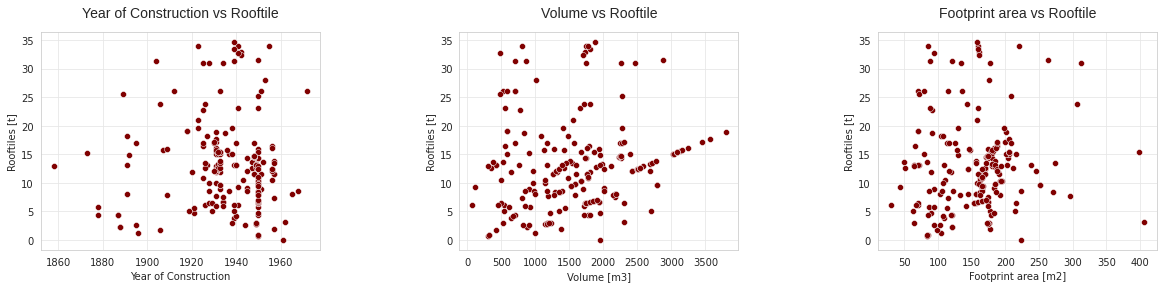

In [ ]:
#SCATTERPLOT CONTINUOUS DATA
f = plt.figure(figsize=(20, 4))
gs = f.add_gridspec(1, 3)
gs.update(wspace = spacing, hspace = spacing)
material = "ROOFTILE"

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.scatterplot(data=new_data, x="YOC", y = material, color = color).set_title(
  'Year of Construction vs Rooftile', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Year of Construction', ylabel = 'Rooftiles [t]')
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.scatterplot(data=new_data, x="VOL", y = material, color = color).set_title(
  'Volume vs Rooftile', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Volume [m3]', ylabel = 'Rooftiles [t]')
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.scatterplot(data=new_data, x="AREA_F", y = material, color = color).set_title(
  'Footprint area vs Rooftile', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Footprint area [m2]', ylabel = 'Rooftiles [t]')
    
f.savefig("z_cont_scatter.png")


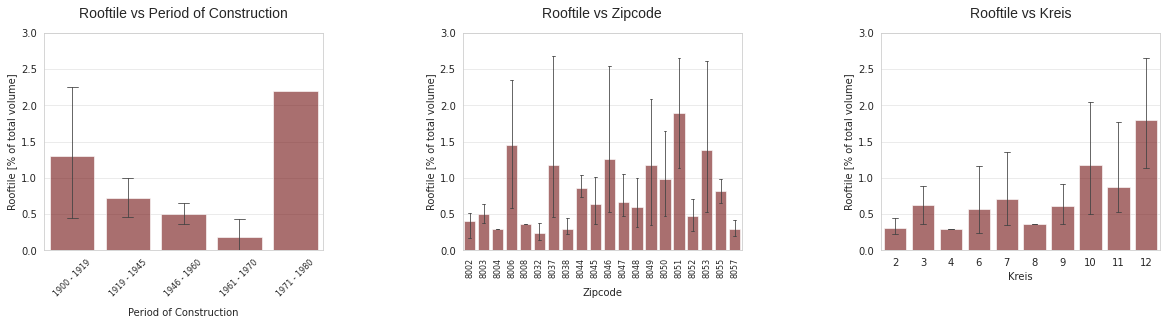

In [ ]:
#CATEGORICAL DATA

f = plt.figure(figsize=(20, 4))
gs = f.add_gridspec(1, 3)
gs.update(wspace = spacing, hspace = spacing)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.barplot(data=new_data, x="POC", y = "percentage", color = color, alpha = 0.6, capsize=.2,errwidth=0.8,  ci = 100, order = ["1900 - 1919", "1919 - 1945", "1946 - 1960", "1961 - 1970", "1971 - 1980"]).set_title(
  'Rooftile vs Period of Construction', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Period of Construction', ylabel = 'Rooftile [% of total volume]')
    plt.ylim(0, 3)
    plt.xticks(rotation=45, size = 8)
    ax.xaxis.labelpad=10.0
    
with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.barplot(data=new_data, x="ZIPCODE", y = "percentage", color = color, alpha = 0.6, capsize=.2,errwidth=0.8,  ci = 100).set_title(
  'Rooftile vs Zipcode', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Zipcode', ylabel = 'Rooftile [% of total volume]')
    plt.ylim(0, 3)
    plt.xticks(rotation=90, size = 8)
    ax.xaxis.labelpad=10.0

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 2])
    sns.barplot(data=new_data, x="KREIS", y = "percentage", color = color, alpha = 0.6, capsize=.2,errwidth=0.8,  ci = 100).set_title(
  'Rooftile vs Kreis', fontdict={'fontsize': title_size, 'horizontalalignment': title_alg, 'fontname': fontname}, pad = tpad)
    ax.set(xlabel='Kreis', ylabel = 'Rooftile [% of total volume]')
    plt.ylim(0, 3)

f.savefig("z_categ_box.png")

Drop m / m3, m/m2

In [ ]:
new_data = new_data.drop(columns=['material_n_m2', 'material_n_m3'])

Correlation factor (nominal + numeric)

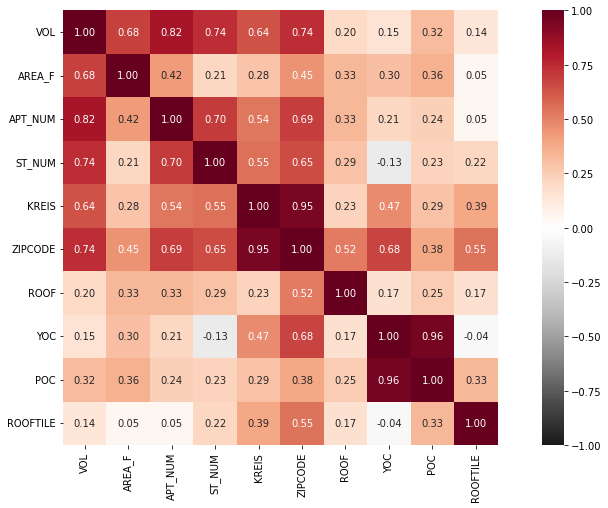

In [ ]:
# using dython library
from dython.nominal import identify_nominal_columns, identify_numeric_columns, correlation_ratio, associations
# Step 1: Instantiate a figure and axis object
fig, ax = plt.subplots(figsize=(16, 8))
# Step 2: Creating a pair-wise correlation plot 
# Saving it into a variable(r)

r = associations(new_data, nominal_columns=['ZIPCODE','ROOF', 'POC', 'KREIS'], numerical_columns=['VOL', 'YOC', 'AREA_F', 'ROOFTILE', 'APT_NUM', 'ST_NUM'], symmetric_nom_nom = False, ax = ax, cmap = "RdGy_r")

#p = correlation_ratio(categories=data['ROOF'].tolist(), measurements=data['WOOD'].tolist())
#print(p)
#identify_nominal_columns(data)
#identify_numeric_columns(data)

fig.savefig("z_correl.png")

In [ ]:
print(new_data.shape)
print(new_data.head())

(213, 10)
    VOL  AREA_F  APT_NUM  ST_NUM  KREIS  ZIPCODE ROOF   YOC          POC  \
0  1328     119        5       5     10     8049    P  1933  1919 - 1945   
2   915      95        1       4     11     8050    P  1933  1919 - 1945   
3   422      72        1       4     11     8050    P  1891       < 1919   
5  1658     160        6       5      9     8047    P  1941  1919 - 1945   
6  1745     160        6       5      9     8047    P  1941  1919 - 1945   

   ROOFTILE  
0     11.90  
2      9.00  
3     13.08  
5     23.18  
6     34.00  


In [ ]:
from google.colab import files

new_data.to_csv('tiles.csv', encoding = 'utf-8-sig') 
files.download('tiles.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>